## Importing the required libraries

In [1]:
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Initializing the path

In [2]:
train_path=('C:/Users/srilu/Documents/GitHub/Brain-Tumor-Detection/Train')
test_path=('C:/Users/srilu/Documents/GitHub/Brain-Tumor-Detection/Test')


## Model building

In [3]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

## Train-test Split

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 213 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'no': 0, 'yes': 1}

In [8]:
test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 40 images belonging to 2 classes.


## Training the model

In [9]:
hist = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = test_dataset
)

Epoch 1/30
7/7 [==============================] - 29s 4s/step - loss: 1.1829 - accuracy: 0.5258 - val_loss: 0.6880 - val_accuracy: 0.7500
Epoch 2/30
7/7 [==============================] - 27s 4s/step - loss: 0.6577 - accuracy: 0.6056 - val_loss: 0.6611 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 27s 4s/step - loss: 0.6126 - accuracy: 0.6479 - val_loss: 0.6463 - val_accuracy: 0.7250
Epoch 4/30
7/7 [==============================] - 27s 4s/step - loss: 0.6693 - accuracy: 0.6244 - val_loss: 0.6592 - val_accuracy: 0.6000
Epoch 5/30
7/7 [==============================] - 27s 4s/step - loss: 0.6467 - accuracy: 0.6761 - val_loss: 0.6475 - val_accuracy: 0.5000
Epoch 6/30
7/7 [==============================] - 27s 4s/step - loss: 0.6117 - accuracy: 0.6995 - val_loss: 0.6234 - val_accuracy: 0.7000
Epoch 7/30
7/7 [==============================] - 27s 4s/step - loss: 0.5931 - accuracy: 0.7089 - val_loss: 0.6212 - val_accuracy: 0.6750
Epoch 8/30
7/7 [==================

In [10]:
model.save('model.h5')

In [11]:
from tensorflow.keras.preprocessing.image import load_img

## Testing the model

In [12]:
img=image.load_img('C:/Users/srilu/Documents/GitHub/Brain-Tumor-Detection/Test/no/3 no.jpg',target_size=(224,224))

In [13]:
x=image.img_to_array(img)
x=x/255

In [14]:
x=np.expand_dims(x,axis=0)

In [15]:
pred=model.predict(x)

In [16]:
pred[0][0]

0.3211537

In [17]:
if pred[0][0] < 0.5:
    print('No tumor detected')
else:
    print('Tumor Detected')

No tumor detected


## Accuracy of model

In [18]:
model.evaluate_generator(test_dataset)[1]

C:\Users\srilu\AppData\Local\Temp/ipykernel_13000/1452447687.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_dataset)[1]


0.800000011920929

In [19]:
history=hist.history.keys()

Text(0.5, 1.0, 'Accuracy Curves')

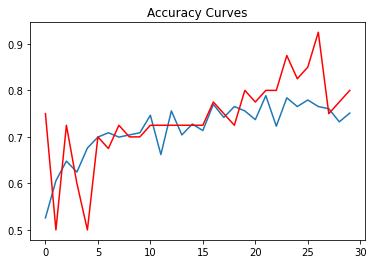

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'],color='red')
plt.title('Accuracy Curves')

Text(0.5, 1.0, 'Loss Curves')

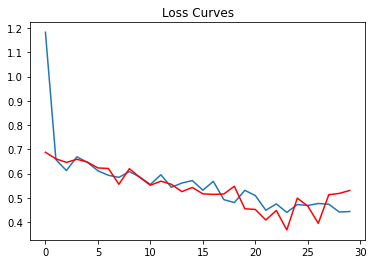

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],color='red')
plt.title('Loss Curves')

import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
import streamlit as st
from PIL import Image
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
model= load_model('model.h5')

st.title('Brain Tumor Detection')
st.subheader('Please upload your MRI')
uploaded_image = st.file_uploader('Choose an image')

def save_uploaded_image(uploaded_image):
    try:
        with open(os.path.join('uploads',uploaded_image.name),'wb') as f:
            f.write(uploaded_image.getbuffer())
        return True
    except:
        return False

if uploaded_image is not None:
    # save the image in a directory
    if save_uploaded_image(uploaded_image):
        # load the image
        display_image = Image.open(uploaded_image)
        img=image.load_img(os.path.join('uploads',uploaded_image.name),target_size=(224,224))
        st.image(img)
        x=image.img_to_array(img)
        x=x/255
        x=np.expand_dims(x,axis=0)
        pred=model.predict(x)
        if pred[0][0] < 0.6:
            st.subheader('No Tumor Detected')
        else:
            st.subheader('Tumor Detected')